# Lab 3: CNN Visualization

Group Members:

- Parker Brown

- Suma Chackola

- Chris Peters

- Oliver Raney



**The execution of this lab was performed collaboratively across 4 computers. Therefore, while the individual cells are not all shown with the direct execution results, the code presented in those cells was utilized to produce the results in this notebook.**


In this lab we will find and analyze a circuit in a common neural network.  A reference figure is also shown to help clarify the process of finding and analyzing deep circuits.

The terminology used in this lab is as follows: 
- (1) a filter refers to the entire tensor that convolves with an input across all channels (i.e., a multi-channel filter like a 3x3x64 tensor)
- (2) a single channel filter refers to one channel of the aforementioned filter (e.g., a 3x3x1 convolution kernel)
- (3) and activation refers to the input or output of the filter depending on context (i.e., input activations for a filter are the inputs from a previous layer, output activations are all the filter outputs from a convolutional layer)
- (4) an input can refer to all input channels or a single input channel depending on the context (entire filter or single channel filter, respectively). 

A diagram is provided for clarity and this was covered in detail in the class lecture. 

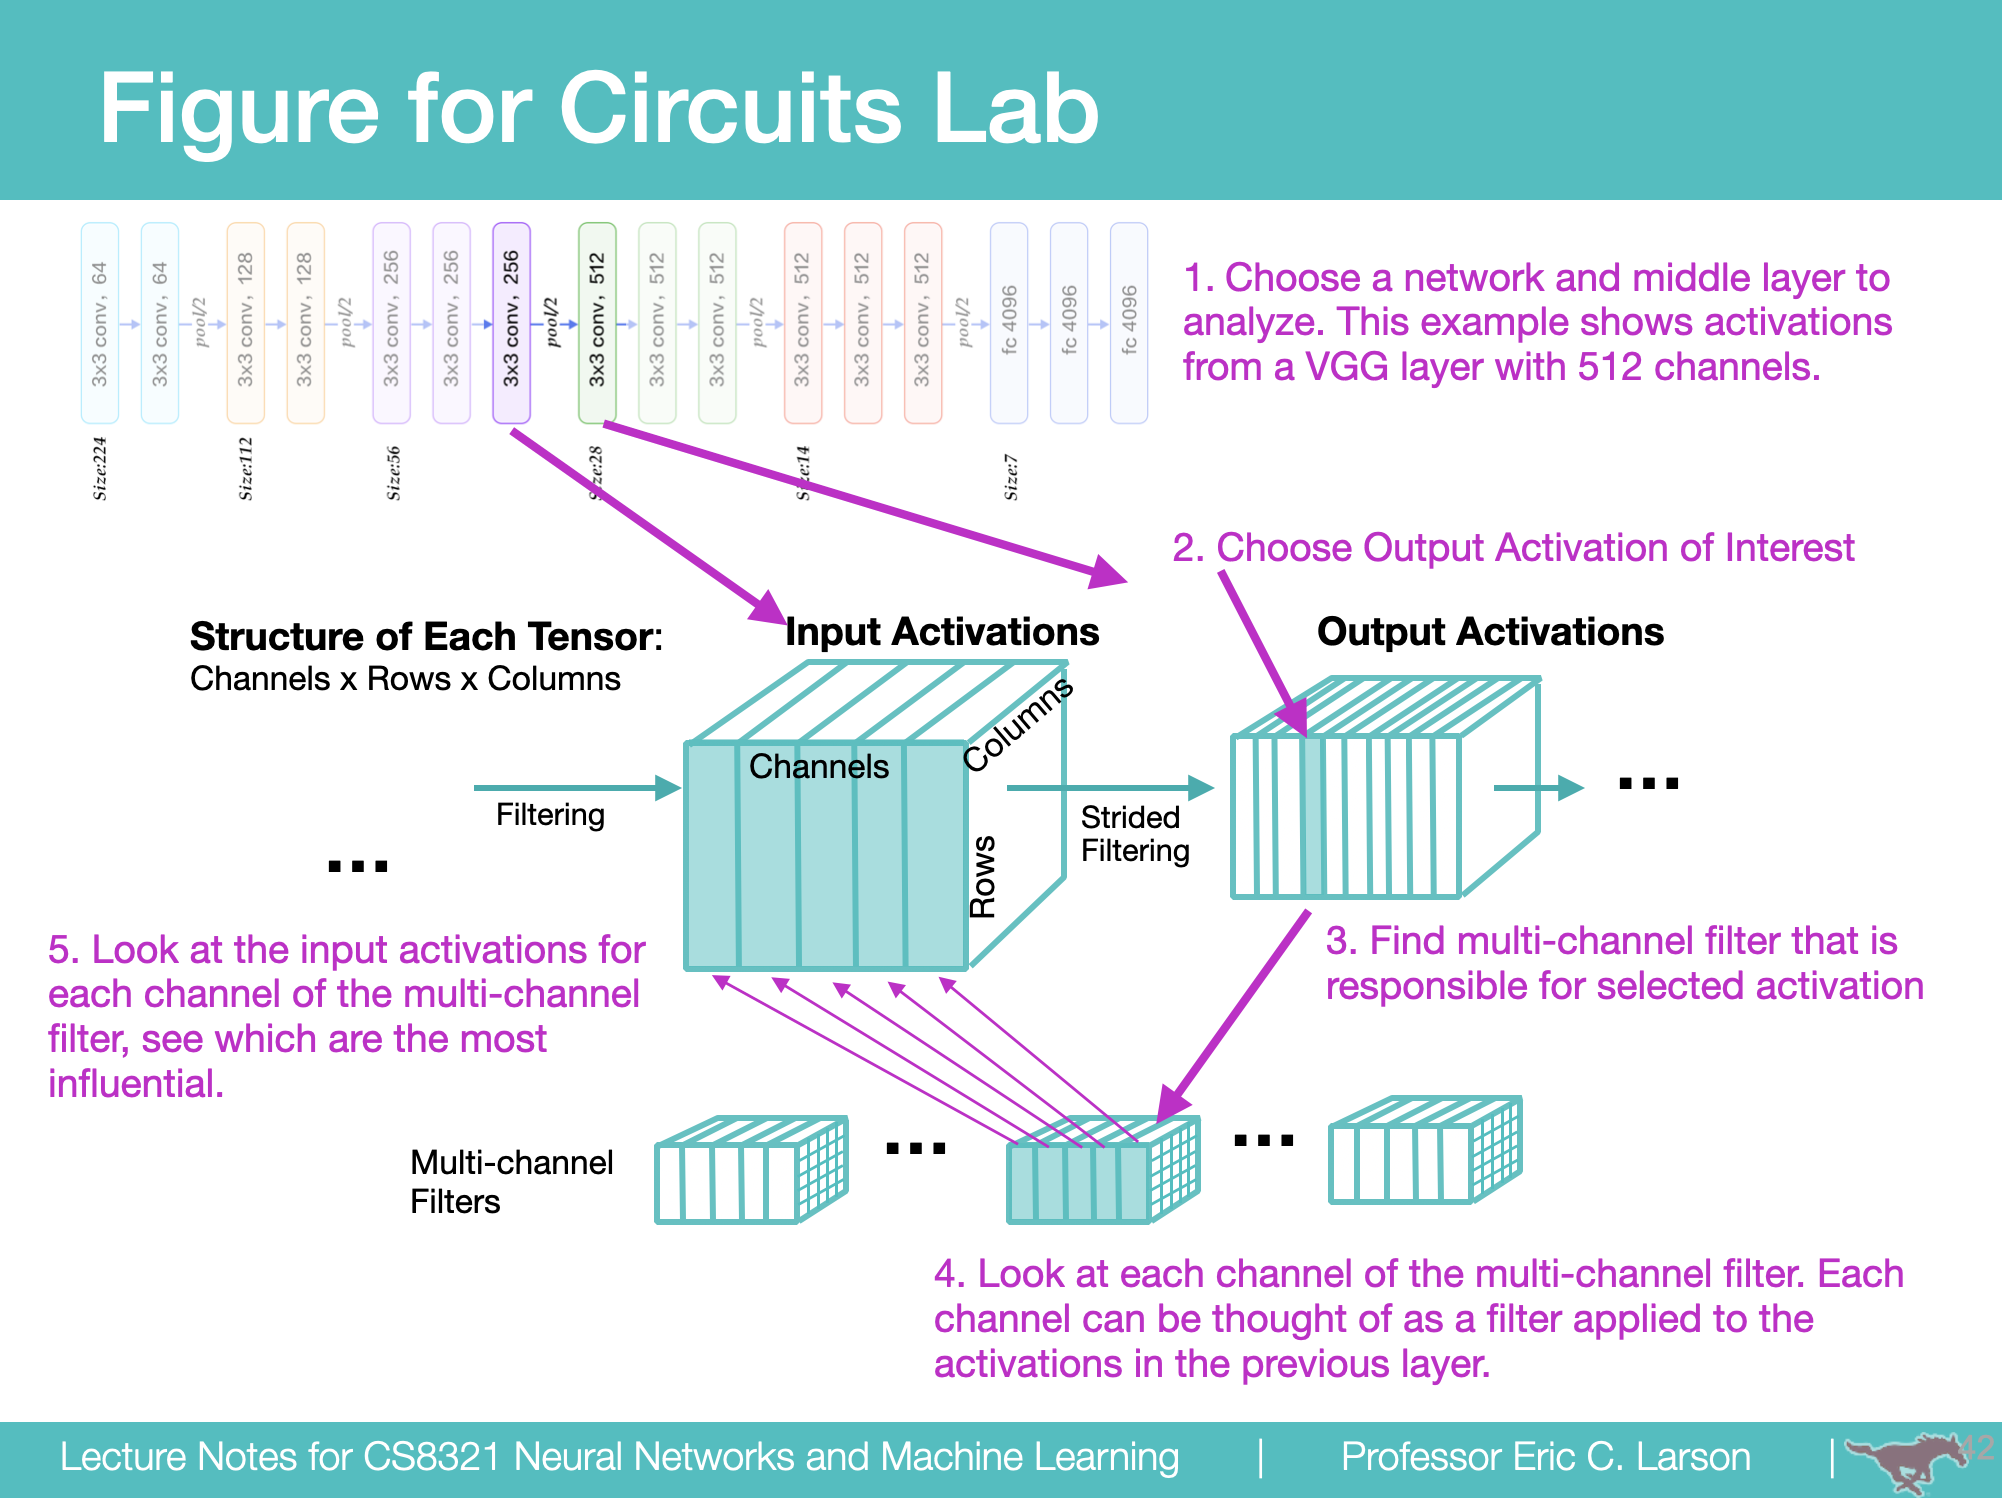

In [1]:
from IPython.display import Image
Image(filename='CircuitsFigure.png') 

<a id="top"></a>
## Contents
* <a href="#P1">1.0 Introduction & CNN Overview</a>
* <a href="#P2">2.0 Circuit Selection & Extraction Hypothesis </a>
* <a href="#P3">3.0 Circuit Analysis </a>
* <a href="#P4">4.0 Image Gradient Visualization </a>
_______________________________


<a href="#top">Back to Top</a>
<a id="P1"></a>
## 1.0 Introduction & CNN Overview
[3 points]
#### In groups, you should select a convolutional neural network model that has been pre-trained on a large dataset (preferably, ImageNet). These already trained models are readily available online through many mechanisms, including the keras.application package (Inception, Xception, VGG etc.) 

https://keras.io/api/applications/

#### - It is recommended to select a model with somewhat simple structure, like VGG. This can help to simplify how to extract specific filters and inputs to filters later on.

#### - Explain the model you chose and why.  Classify a few images with pre-trained network to verify that it is working properly.

<span style="color:blue">
    Notes:
- No training involved: Use VGG and play with it!
    
- VGG16 has layers and structure that makes sense for this lab

- Classify dogs, cats, etc to verify
</span>

<a href="#top">Back to Top</a>
<a id="P2"></a>
## 2.0 Circuit Selection & Extraction Hypothesis
[4 points]
#### Select a multi-channel filter (i.e., a feature) in a layer in which to analyze as part of a circuit. This should be a multi-channel filter in a "mid-level" portion of the network (that is, there are convolutional layers before and after this chosen layer). You might find using OpenAI microscope a helpful tool for selecting a filter to analyze without writing too much code: 
https://microscope.openai.com/models/

#### - Using image gradient techniques, find an input image that maximally excites this chosen multi-channel filter. General techniques are available from class: 

https://github.com/8000net/LectureNotesMaster/blob/master/04%20LectureVisualizingConvnets.ipynb
#### - Also send images of varying class (i.e., from ImageNet) through the network and track which classes of images most excite your chosen filter. 
#### - Give a hypothesis for what this multi-channel filter might be extracting. That is, what do you think its function is in the network? Give reasoning for your hypothesis. 
#### - If using code from another source or a LLM, you should heavily document the code so that I can grade your understanding of the code used. 

<span style="color:blue">
    Notes:
- Will need to visualize a bunch of layers. OR Go to Open AI microscope to select filter & analyze it
    
- Regarding Image Gradient techniques: Look at code from notebook that updates the input image to maximally excite the filter. Do not take a bunch of images and see which has biggest output. Use input gradient techniques

- Regarding sending images of varying classes:
    - Also send images of varying classes through network & track which classes are most excitatory to chosen filter. 
    - Take random images (2000 or so), run them through VGG for the particular filter you've chosen, save off the output activations, and sum them up. See which has the biggest sum. 
</span>

<a href="#top">Back to Top</a>
<a id="P3"></a>
## 3.0 Circuit Analysis
[4 points]
#### Analyze each channel of the multi-channel filter to better understand how this might form a circuit (i.e., the weights of the filter). That is, visualize the convolutional filter (one channel at a time) between the input activations and the current activation to understand which inputs make up a circuit. You should avoid filter channels that are mostly "zero" coefficients. These are not influential for the circuit. One method of doing this is given below:

#### - Extract the filter coefficients for each input activation to that multi-channel filter. Note: If the multi-channel filter is 5x5 with an input channel size of 64, then this extraction will result in 64 different single channel filters, each of size 5x5. 
#### - Keep the top ten sets of inputs with the "strongest" weights. For now, you can use the L2 norm of each input filter as a measure of strength. Visualize these top ten filters. 
#### - For these ten strongest input filters, categorize each as "mostly inhibitory" or "mostly excitatory." That is, does each filter consist of mostly negative or mostly positive coefficients?  



<span style="color:blue">
    Notes:
    
- Regarding Extract the filter coefficients
    - Look at all of the input activations for this particular output activation and visualize the input activations & filter channels that most influence filter output. 
    - How? One way: extract the filter coeffs for every channel of your multi-channel filter. For 64 filters: you'll have 64 separate 3x3 filters

- Regarding top 10:
    - Keep top 10 with strongest weights. How? Take sum or max of all by 3x3 filters.
    
- Regarding "mostly inhibibotry/excitatory": Look at filter value to determine their categorization
</span>

<a href="#top">Back to Top</a>
<a id="P4"></a>
## 4.0 Image Gradient Visualization
[4 points]
#### For each of the ten chosen single channels of the filter, use image gradient techniques to visualize what each of these filters is most excited by (that is, what image maximally excites each of these filters?). This is a similar analysis to the first step in this rubric, but now isolating the activations the layer preceding your chosen filter. This should only be completed for the ten most influential filters.  

#### - Use these visualizations, along with the circuit weights you just discovered to try and explain how this particular circuit works. An example of this visualization style can be seen here:

https://storage.googleapis.com/distill-circuits/inceptionv1-weight-explorer/mixed3b_379.html
#### - Try to define the properties of this circuit using vocabulary from https://distill.pub/2020/circuits/zoom-in/Links to an external site. (such as determining if this is polysemantic, pose-invariant, etc.)  

#### - Relate your visualizations back to your original hypothesis about what this filter is extracting. Does it support or refute your hypothesis? Why? 

<span style="color:blue">
    Notes:
    
- Use Gradient techniques for this
    
- Start at the output activation, figure out the channels of the filter that are most important, then use those to index into the previous layer & excite those in the same way with image gradient techniques (looking for strong weights) - later layers are sparse and give the biggest indicator of what is activating
    
</span>